# Plot Benchmark Experiments

After running "make benchmark" there will be a few results that need to be parsed.

In [1]:
import json
import plotly
import plotly.express as px
import os
import pandas as pd

In [ ]:
import plotly.io as pio 
# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderer
# pio.renderers.default = "plotly_mimetype+notebook+png"
pio.renderers.default = "png"

In [2]:
#The KeyValue pair in these results are:
        # "value being tested":"directory of results"

benchmark_results_paths = {'agents':'../output/experiment1/',
                          # 'space':'../output/experiment2/spatial_area/',
                          # 'cores':'../output/experiment3/core_number/',
                          # 'ticks':'../output/experiment4/tk_number/',
                          }

In [3]:
list_of_dicts = []
for key, value in benchmark_results_paths.items():
    print('----------------')
    print(f'Folder: {value}')
    for file in os.listdir(value): 
        print(f'  file: {file}') 
        if os.path.splitext(file)[-1] == '.json':
            full_path = os.path.join(value,file)
            with open(full_path) as f:
                d = json.load(f)
                d['key'] = key
                d['value'] = value
                d['file'] = file
                d['full_path'] = full_path
                list_of_dicts.append(d) 
print('----------------')
df = pd.DataFrame(list_of_dicts)

----------------
Folder: ../output/experiment1/
  file: ex1_run3.csv
  file: ex1_run2.csv
  file: ex1_run1.csv
  file: ex1_run2.json
  file: ex1_run3.json
  file: ex1_run1.json
----------------


## Number of Agents being simulated

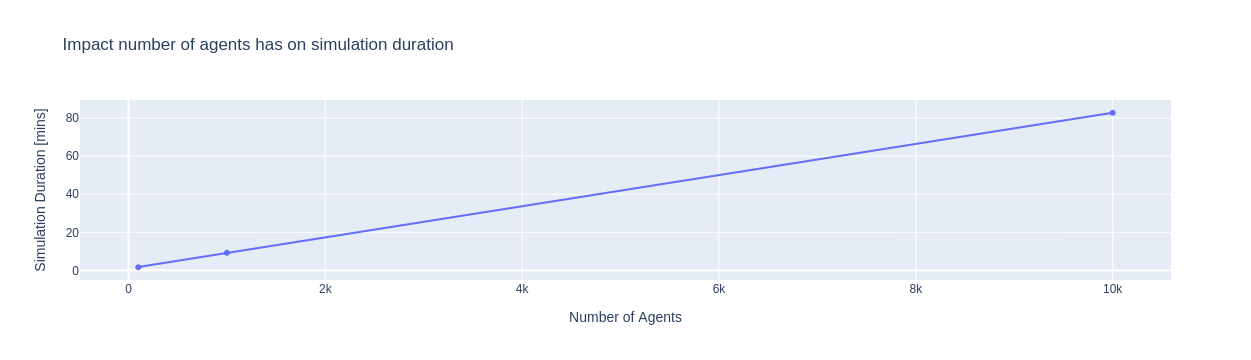

In [5]:
df1 = df[df.key == 'agents']
df1
fig = px.scatter(df1, 
                 x="agents_at_start", 
                 y="sim_duration_minutes", 
                 trendline="ols",
                 title="Impact number of agents has on simulation duration",
                 labels={
                     "agents_at_start": "Number of Agents",
                     "sim_duration_minutes": "Simulation Duration [mins]"} )
fig.show()

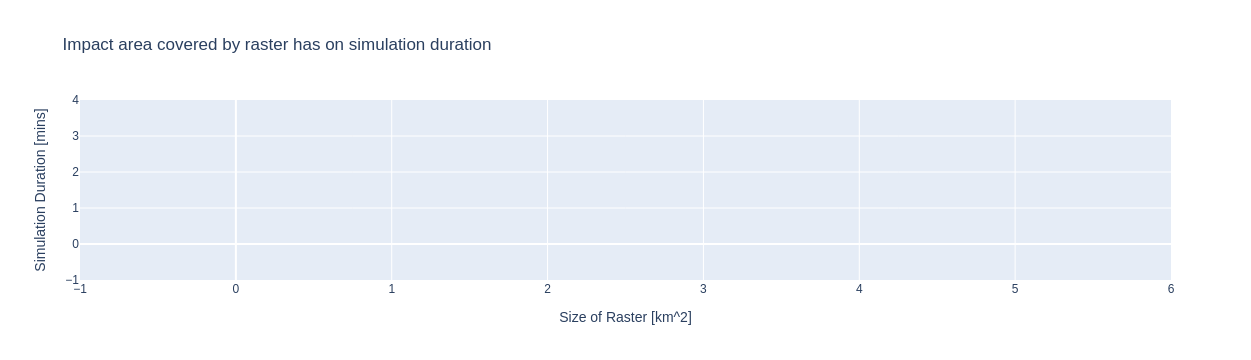

In [6]:
df1 = df[df.key == 'space'] 
fig = px.scatter(df1, 
                 x="spatial_km2", 
                 y="sim_duration_minutes", 
                 trendline="ols",
                 title="Impact area covered by raster has on simulation duration",
                 labels={
                     "spatial_km2": "Size of Raster [km^2]",
                     "sim_duration_minutes": "Simulation Duration [mins]"} )
fig.show()

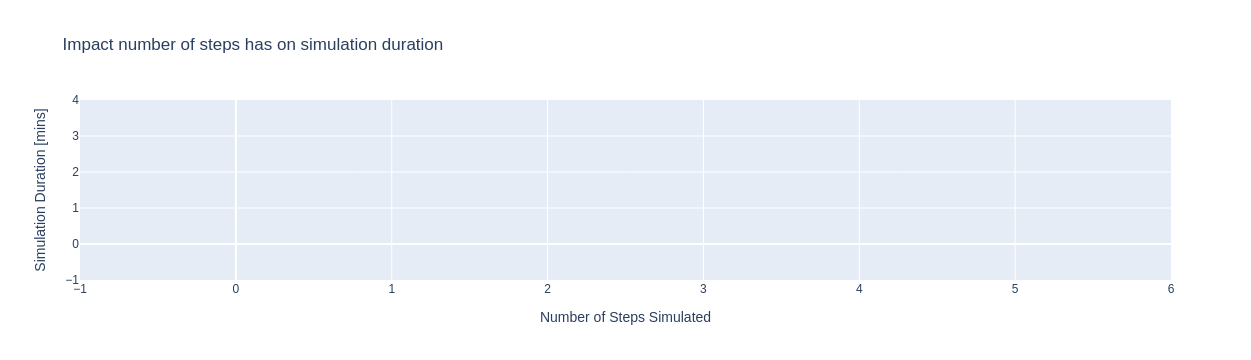

In [7]:
df1 = df[df.key == 'ticks'] 
fig = px.scatter(df1, 
                 x="model_end_tick", 
                 y="sim_duration_minutes", 
                 trendline="ols",
                 title="Impact number of steps has on simulation duration",
                 labels={
                     "model_end_tick": "Number of Steps Simulated",
                     "sim_duration_minutes": "Simulation Duration [mins]"} )
fig.show()

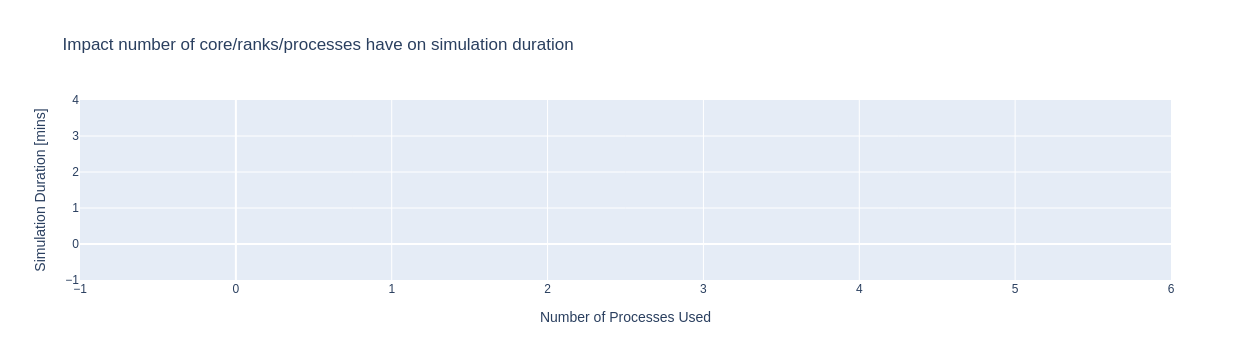

In [8]:
df1 = df[df.key == 'cores'] 
fig = px.scatter(df1, 
                 x="number_of_ranks", 
                 y="sim_duration_minutes", 
                 trendline="ols",
                 title="Impact number of core/ranks/processes have on simulation duration",
                 labels={
                     "number_of_ranks": "Number of Processes Used",
                     "sim_duration_minutes": "Simulation Duration [mins]"} )
fig.show()